In [2]:
import numpy as np 
from numpy import inf
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from math import sqrt
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.utils.data as utils
import time


In [3]:
SP=pd.read_csv('PS1_data.csv',delimiter=',',index_col='date')
SP

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA,CAD,EUR,EUR.1,EUR.2,JPY,GBP,USD,BRL
date,,,,,,,,,,,,,,,,
04.01.00,8202.60,5672.02,6586.95,4657.83,19002.86,6665.90,1399.42,15851.00,0.6884,1.0296,1.0296,1.0296,0.009685,1.6360,1,0.5403
05.01.00,8119.42,5479.70,6502.07,4541.75,18542.55,6535.90,1402.11,16245.14,0.6897,1.0321,1.0321,1.0321,0.009604,1.6426,1,0.5438
06.01.00,8114.24,5450.11,6474.92,4500.69,18168.27,6447.20,1403.45,16106.89,0.6850,1.0328,1.0328,1.0328,0.009503,1.6474,1,0.5430
07.01.00,8429.42,5539.61,6780.96,4648.27,18193.41,6504.80,1441.47,16309.15,0.6869,1.0295,1.0295,1.0295,0.009493,1.6393,1,0.5474
08.01.00,8429.42,5539.61,6780.96,4648.27,18193.41,6504.80,1441.47,16309.15,0.6869,1.0295,1.0295,1.0295,0.009493,1.6393,1,0.5474
09.01.00,8429.42,5539.61,6780.96,4648.27,18193.41,6504.80,1441.47,16309.15,0.6869,1.0295,1.0295,1.0295,0.009493,1.6393,1,0.5474
10.01.00,8602.50,5646.12,6925.52,4714.03,18193.41,6607.70,1457.60,17022.13,0.6869,1.0256,1.0256,1.0256,0.009514,1.6374,1,0.5510
11.01.00,8442.61,5613.90,6891.25,4671.50,18850.92,6518.90,1438.56,16572.72,0.6861,1.0336,1.0336,1.0336,0.009437,1.6475,1,0.5487
12.01.00,8359.96,5582.50,6912.81,4649.30,18677.42,6532.80,1432.25,16616.87,0.6878,1.0309,1.0309,1.0309,0.009451,1.6466,1,0.5471


In [4]:
print(SP.columns)
SP.isna().sum()

Index(['TSX', 'CAC', 'DAX', 'Eurostoxx50', 'NIKKEI225', 'FTSE100', 'SP500',
       'IBOVESPA', 'CAD', 'EUR', 'EUR.1', 'EUR.2', 'JPY', 'GBP', 'USD', 'BRL'],
      dtype='object')


TSX            0
CAC            0
DAX            0
Eurostoxx50    0
NIKKEI225      0
FTSE100        0
SP500          0
IBOVESPA       0
CAD            0
EUR            0
EUR.1          0
EUR.2          0
JPY            0
GBP            0
USD            0
BRL            0
dtype: int64

In [5]:
df_daily_without_fx = SP[['TSX', 'CAC', 'DAX', 'Eurostoxx50', 'NIKKEI225', 'FTSE100', 'SP500',
       'IBOVESPA']]

currencies_fx = SP[['CAD', 'EUR', 'EUR.1', 'EUR.2', 'JPY', 'GBP', 'USD', 'BRL']]

df_daily = pd.DataFrame(df_daily_without_fx.values*currencies_fx.values, columns=df_daily_without_fx.columns, index=df_daily_without_fx.index)

index = pd.to_datetime(df_daily.index,format='%d.%m.%y').strftime('%m/%d/%Y')
df_daily.index = index

print(df_daily.isna().sum())
print(df_daily.min()) # the zero of BRK is dangerous to calculate its return need to change it by the median

print(df_daily)

TSX            0
CAC            0
DAX            0
Eurostoxx50    0
NIKKEI225      0
FTSE100        0
SP500          0
IBOVESPA       0
dtype: int64
TSX            3566.985179
CAC            2630.416790
DAX            2421.493632
Eurostoxx50    2033.124288
NIKKEI225        63.160620
FTSE100        4880.010240
SP500           676.530000
IBOVESPA       2117.832640
dtype: float64
                    TSX          CAC           DAX  Eurostoxx50   NIKKEI225  \
01/04/2000  5646.669840  5839.911792   6781.923720  4795.701768  184.042699   
01/05/2000  5599.963974  5655.598370   6710.786447  4687.540175  178.082650   
01/06/2000  5558.254400  5628.873608   6687.297376  4648.312632  172.653070   
01/07/2000  5790.168598  5703.028495   6980.998320  4785.393965  172.710041   
01/08/2000  5790.168598  5703.028495   6980.998320  4785.393965  172.710041   
01/09/2000  5790.168598  5703.028495   6980.998320  4785.393965  172.710041   
01/10/2000  5909.057250  5790.660672   7102.813312  4834.709168  17

In [6]:
ret_daily= np.log(df_daily ).diff()
ret_daily = ret_daily.dropna()
ret_daily

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
01/05/2000,-0.008306,-0.032070,-0.010545,-0.022812,-0.032920,-0.015669,0.001920,0.031018
01/06/2000,-0.007476,-0.004737,-0.003506,-0.008404,-0.030964,-0.010746,0.000955,-0.010019
01/07/2000,0.040877,0.013088,0.042982,0.029064,0.000330,0.003965,0.026730,0.020550
01/08/2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01/09/2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01/10/2000,0.020325,0.015249,0.017299,0.010253,0.002210,0.014536,0.011128,0.049343
01/11/2000,-0.019927,0.002047,0.002809,-0.001293,0.027376,-0.007381,-0.013149,-0.030939
01/12/2000,-0.007363,-0.008225,0.000508,-0.007379,-0.007764,0.001584,-0.004396,-0.000260
01/13/2000,0.009090,0.004089,0.001266,0.003405,0.005344,0.000165,0.012096,0.048187
01/14/2000,-0.006630,0.013659,0.017406,0.016287,0.008961,0.009513,0.010615,0.025655


In [7]:
fama_daily = pd.read_csv('fama_french.csv',delimiter=',')
rf_daily = fama_daily['RF']

dates = fama_daily['date']
dates = pd.to_datetime(dates,format='%Y%m%d').dt.strftime('%m/%d/%Y')

rf_daily.index = dates

target_dates = df_daily.index

Rf_fama = rf_daily.loc[target_dates]
print(Rf_fama.shape, ret_daily.shape)
print(Rf_fama.isna().sum())
mask = Rf_fama.isna()
for i in range(len(Rf_fama)):
    if mask[i] == True:
        Rf_fama[i]= Rf_fama[i-1]
print(Rf_fama)
Rf_fama.isna().sum()
print(Rf_fama.shape,ret_daily.shape)

(5852,) (5851, 8)
1822
01/04/2000    0.021
01/05/2000    0.021
01/06/2000    0.021
01/07/2000    0.021
01/08/2000    0.021
01/09/2000    0.021
01/10/2000    0.021
01/11/2000    0.021
01/12/2000    0.021
01/13/2000    0.021
01/14/2000    0.021
01/15/2000    0.021
01/16/2000    0.021
01/17/2000    0.021
01/18/2000    0.021
01/19/2000    0.021
01/20/2000    0.021
01/21/2000    0.021
01/22/2000    0.021
01/23/2000    0.021
01/24/2000    0.021
01/25/2000    0.021
01/26/2000    0.021
01/27/2000    0.021
01/28/2000    0.021
01/29/2000    0.021
01/30/2000    0.021
01/31/2000    0.021
02/01/2000    0.022
02/02/2000    0.022
              ...  
12/13/2015    0.000
12/14/2015    0.000
12/15/2015    0.000
12/16/2015    0.000
12/17/2015    0.000
12/18/2015    0.000
12/19/2015    0.000
12/20/2015    0.000
12/21/2015    0.000
12/22/2015    0.000
12/23/2015    0.000
12/24/2015    0.000
12/25/2015    0.000
12/26/2015    0.000
12/27/2015    0.000
12/28/2015    0.000
12/29/2015    0.000
12/30/2015    0.0

/home/gregoire/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


## General Parameters

In [241]:
number = 5
rolling_window_step = 200
lr = 0.00001
epochs = 27
VALIDATION_SPLIT=0.9

In [242]:
def dailytosomething(df,rf,number):
    new_df = df.iloc[::number]
    new_rf = rf.iloc[::number]
    new_rf = new_rf.iloc[:].shift(1)#/12
    ret= new_df.pct_change(1)
    ret = ret[1:]
    rf_final = new_rf[1:]
    return ret,rf_final

ret_weekly, Rf_weekly = dailytosomething(df_daily,Rf_fama,number)
print(ret_weekly.shape)
print(Rf_weekly.shape)

Rf_weekly = ((1 + Rf_weekly)**number) -1


print(ret_weekly)
Rf_weekly
#print(ret_daily.iloc[:number])
#print(ret_weekly.shape)

(1170, 8)
(1170,)
                 TSX       CAC       DAX  Eurostoxx50  NIKKEI225   FTSE100  \
01/09/2000  0.025413 -0.023439  0.029354    -0.002149  -0.061576 -0.022199   
01/14/2000 -0.004495  0.027182  0.040071     0.021500   0.036787  0.018587   
01/19/2000  0.031719 -0.022780 -0.010382    -0.011556   0.002175 -0.023831   
01/24/2000 -0.014872  0.001264 -0.028315    -0.016361   0.006182 -0.005304   
01/29/2000 -0.009799 -0.025433 -0.013476    -0.019311   0.004770 -0.020608   
02/03/2000  0.063287  0.089227  0.056402     0.071160   0.013404 -0.022067   
02/08/2000  0.044031  0.020028  0.022553     0.021729  -0.012475  0.002687   
02/13/2000 -0.019614  0.000335  0.010214     0.005804  -0.002350 -0.025539   
02/18/2000  0.014865 -0.039191 -0.008590    -0.025906  -0.015547  0.000240   
02/23/2000 -0.004450  0.014728  0.036883     0.021310  -0.014056 -0.001772   
02/28/2000 -0.004043 -0.021117 -0.046636    -0.024911   0.023173 -0.012256   
03/04/2000  0.027007  0.053887  0.035858     0

01/09/2000    0.109504
01/14/2000    0.109504
01/19/2000    0.109504
01/24/2000    0.109504
01/29/2000    0.109504
02/03/2000    0.109504
02/08/2000    0.114948
02/13/2000    0.114948
02/18/2000    0.114948
02/23/2000    0.114948
02/28/2000    0.114948
03/04/2000    0.114948
03/09/2000    0.104081
03/14/2000    0.104081
03/19/2000    0.104081
03/24/2000    0.104081
03/29/2000    0.104081
04/03/2000    0.104081
04/08/2000    0.125900
04/13/2000    0.125900
04/18/2000    0.125900
04/23/2000    0.125900
04/28/2000    0.125900
05/03/2000    0.125900
05/08/2000    0.120413
05/13/2000    0.120413
05/18/2000    0.120413
05/23/2000    0.120413
05/28/2000    0.120413
06/02/2000    0.120413
                ...   
08/18/2015    0.000000
08/23/2015    0.000000
08/28/2015    0.000000
09/02/2015    0.000000
09/07/2015    0.000000
09/12/2015    0.000000
09/17/2015    0.000000
09/22/2015    0.000000
09/27/2015    0.000000
10/02/2015    0.000000
10/07/2015    0.000000
10/12/2015    0.000000
10/17/2015 

In [243]:
#compute portfolio weights

roll_weekly_mean = ret_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).mean() #rolling window = 12 month * 10 years of data to define returns of each portfolios
roll_weekly_std = ret_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).std()
roll_weekly_cov = ret_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).cov()
roll_weekly_Rf = Rf_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).mean()


0.109503586489

 (a) Time series of the portfolio weights:


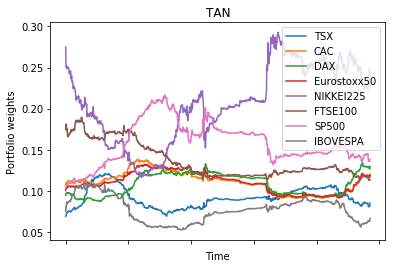

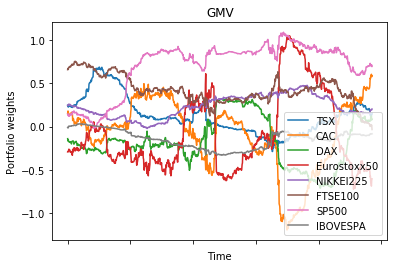

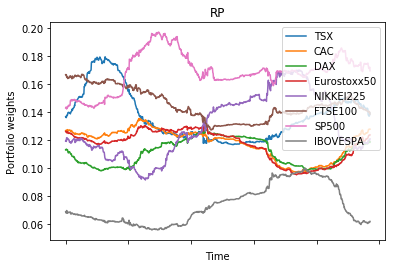

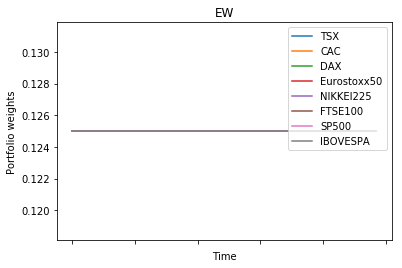

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [244]:
number_of_indexes = ret_weekly.shape[1]
ONES = np.ones(number_of_indexes)

dates = ret_weekly.iloc[(rolling_window_step-1):].index.get_level_values(0)

def tangency_Portfolio(m,C,rf):
    # find number of rows and columns for the covariance matrix 
    (nr,nc)=C.shape
    A=np.matrix([[0.0] for r in range(nr)])
    A=(1/C)*(m-rf)
    (nr,nc)=A.shape
    A=A/sum(A[r,0] for r in range(nr))
    w=[A[r,0] for r in range(nr)]
    return np.matrix(w)

print(Rf_weekly[0])
#Rf_weekly.index = ret_weekly.index[1:]
#Rf_weekly.index = ret_weekly.index[1:]

w = np.zeros((len(dates), 4, number_of_indexes))
i = 0
for date in dates: 
    # esimation of parameters
    MU = roll_weekly_mean.loc[date].values
    STD = roll_weekly_std.loc[date].values
    SIGMA = roll_weekly_cov.loc[date].values
    INV_SIGMA = np.linalg.inv(SIGMA)
    #R0 = roll_Rf.loc[date]
    #i.e., estimation of risk premium (mu-R0)
    #An alternative is to esimate the expected return mu,
    #and to use the current risk-free ratioto compute the weights.
    #In this second case, set: 
    R0 = roll_weekly_Rf.loc[date]
    
    A = (ONES@INV_SIGMA)@ONES    
    # composition of portfolio
    w[i,0,:] = tangency_Portfolio(MU, SIGMA, R0)[0] #TAN
    w[i,1,:] = (INV_SIGMA@ONES)/A # GMV
    tmp = 1/STD
    w[i,2,:] = tmp/tmp.sum() #RP
    w[i,3,:] = np.ones(number_of_indexes)/number_of_indexes #EW
    i+=1
    

#plotting portfolios
columns = ret_weekly.columns
asset_classes = columns
strategies = ['TAN','GMV','RP','EW']

print('\n (a) Time series of the portfolio weights:')
for i in range(len(strategies)): 
    df_w = pd.DataFrame(data=w[:,i,:],index=dates,columns=asset_classes)
    df_w.plot(title=strategies[i])
    plt.xlabel('Time')
    plt.ylabel('Portfolio weights')
    plt.legend(asset_classes, loc=0)
    plt.show()
print(sum(np.isnan(w)))

In [245]:
#computing portfolio returns
dates_perf = ret_weekly.iloc[rolling_window_step:].index.get_level_values(0)

p_perf = np.zeros((len(dates_perf), 4))
for j in range(len(strategies)): 
    tmp = np.multiply(w[:-1,j,:],ret_weekly.iloc[rolling_window_step:]) # :-1 means except the last
    p_perf[:,j] = tmp.sum(axis=1) # sum over each lines of the matrix and p_perf = returns on each portfolios [return port for each time, strategies]
    
df_p_perf = pd.DataFrame(data=p_perf,index=dates_perf,columns=strategies)

R0 = Rf_weekly.loc[dates_perf].mean()
M = df_p_perf.mean()
E = df_p_perf.mean()-R0
S = df_p_perf.std()
SR = E/S
index = ['Mean Return', 'Mean Excess Return', 'Std. Dev.', 'Sharpe Ratio']
pStats = pd.DataFrame({index[0] : M, 
                    index[1] : E,
                    index[2] : S, 
                    index[3] : SR
                      })
pStats = pStats.T
pStats = pStats.reindex(index)

index_a = [' (ann.)']*4
index_a = [x+y for x, y in zip(index, index_a)]
pStats_a = pd.DataFrame({index_a[0] : M*12, # change *12 cause were not anymore annual
                    index_a[1] : E*12,  # change *12 cause were not anymore annual
                    index_a[2] : S*np.sqrt(12),  # change *12 cause were not anymore annual
                    index_a[3] : SR*np.sqrt(12)  # change *12 cause were not anymore annual
                      })
pStats_a = pStats_a.T
pStats_a = pStats_a.reindex(index_a)

print('\n (b) Mean, standard deviation and Sharpe ratio of portfolio returns:')
print('\n The monthly return statistics of the strategies are:')
display(np.around(pStats,6))
print('\n The annualized return statistics of the strategies are:')
display(np.around(pStats_a,6))




 (b) Mean, standard deviation and Sharpe ratio of portfolio returns:

 The monthly return statistics of the strategies are:


,TAN,GMV,RP,EW
Mean Return,0.001160,0.000657,0.001134,0.001261
Mean Excess Return,-0.024473,-0.024977,-0.024499,-0.024373
Std. Dev.,0.022109,0.016682,0.022654,0.023906
Sharpe Ratio,-1.106927,-1.497260,-1.081462,-1.019532



 The annualized return statistics of the strategies are:


,TAN,GMV,RP,EW
Mean Return (ann.),0.013925,0.007881,0.013613,0.015131
Mean Excess Return (ann.),-0.293679,-0.299722,-0.293990,-0.292472
Std. Dev. (ann.),0.076588,0.057787,0.078475,0.082812
Sharpe Ratio (ann.),-3.834508,-5.186661,-3.746295,-3.531762



 (d) Minimum-variance frontier and location of the 4 portfolios using ex-post performance:


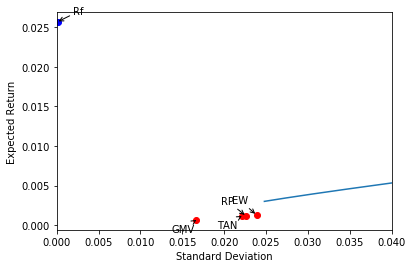

In [246]:
#MV frontiers
Mup = np.linspace(0.003,0.009,1000)
MU = ret_weekly.loc[dates_perf].mean().values
SIGMA = ret_weekly.loc[dates_perf].cov().values
INV_SIGMA = np.linalg.inv(SIGMA)


A = (ONES@INV_SIGMA)@ONES
B = (ONES@INV_SIGMA)@MU
C = (MU@INV_SIGMA)@MU
DELTA = A*C-B**2

Sigmap = np.sqrt((A*np.multiply(Mup,Mup)-2*B*Mup+C)/DELTA)

plt.plot(Sigmap,Mup)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.plot(S,M,'ro')
plt.plot(0.0001,R0,'bo')
plt.xlim(0, 0.04)


plt.annotate('TAN', xy=(S[0],M[0]), xytext=(S[0]-.003, M[0]-.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('GMV', xy=(S[1],M[1]), xytext=(S[1]-.003, M[1]-.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('RP', xy=(S[2],M[2]), xytext=(S[2]-.003, M[2]+.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('EW', xy=(S[3],M[3]), xytext=(S[3]-.003, M[3]+.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Rf', xy=(0, R0), xytext=(.001+.001, R0+.001),
            arrowprops=dict(arrowstyle="->")          
            )

print('\n (d) Minimum-variance frontier and location of the 4 portfolios using ex-post performance:')
plt.show()





 (e) Cumulative performance of 1$ invested in December 1987:


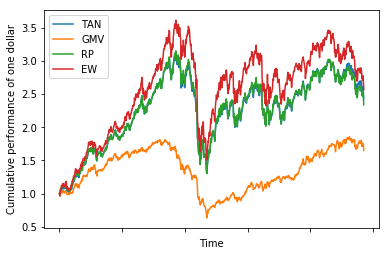

In [247]:
#total return index
dates_cumperf = ret_weekly.iloc[(rolling_window_step-1):].index.get_level_values(0)
ones = np.ones((1,4))

cumperf = np.cumprod(np.concatenate((ones,1 + p_perf),axis=0),axis=0) #cumprod because when we win money we reinvest it directly
df_cumperf = pd.DataFrame(data=cumperf,index=dates_cumperf,columns=strategies)

#df_cumperf.drop(columns=['TAN'],inplace=True)
df_cumperf.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative performance of one dollar')
strategies = ['TAN','GMV','RP','EW']
#strategies = ['GMV','RP','EW']
plt.legend(strategies, loc=0)
#plt.ylim([-20,50])


print('\n (e) Cumulative performance of 1$ invested in December 1987:')
plt.show()


In [248]:
labels = np.zeros(len(p_perf))
for i in range(len(p_perf)): # the goal is to define the classification of the labels for the crossentropy loss
    opt = np.argmax(p_perf[i,:])
    labels[i] = opt
print(labels.shape)
print(labels)

labels_training = labels[:1012]
labels_test = labels[1012:]

print(labels_training.shape[0] + labels_test.shape[0])

(970,)
[ 3.  2.  2.  3.  3.  0.  3.  1.  2.  3.  0.  0.  3.  1.  3.  3.  1.  1.
  3.  3.  3.  1.  1.  1.  3.  1.  1.  2.  1.  1.  0.  3.  1.  2.  1.  3.
  3.  3.  1.  3.  2.  3.  0.  0.  1.  2.  1.  2.  3.  1.  3.  2.  1.  1.
  0.  0.  3.  3.  3.  1.  2.  1.  1.  0.  0.  1.  3.  3.  1.  3.  0.  1.
  3.  0.  3.  1.  0.  1.  0.  3.  3.  2.  1.  0.  3.  0.  1.  2.  3.  1.
  3.  1.  3.  1.  2.  3.  3.  1.  1.  3.  1.  1.  1.  0.  3.  1.  1.  1.
  0.  3.  1.  0.  2.  2.  3.  2.  1.  1.  3.  1.  3.  1.  3.  1.  3.  2.
  3.  3.  1.  1.  3.  1.  1.  3.  1.  3.  1.  3.  0.  0.  1.  0.  3.  3.
  1.  3.  3.  1.  1.  0.  1.  2.  3.  2.  3.  0.  1.  3.  0.  2.  3.  1.
  3.  1.  1.  1.  1.  0.  1.  0.  3.  3.  1.  1.  1.  3.  1.  2.  0.  1.
  1.  3.  3.  0.  0.  2.  1.  1.  1.  3.  1.  1.  3.  3.  1.  1.  1.  1.
  3.  1.  3.  1.  3.  3.  3.  1.  3.  3.  3.  1.  1.  3.  1.  3.  3.  1.
  3.  3.  3.  0.  0.  0.  1.  0.  1.  3.  1.  0.  0.  3.  3.  3.  1.  3.
  0.  3.  2.  3.  3.  1.  1.  3.  3.  3.  3.

In [249]:
print(sum(labels_training == 0))
print(sum(labels_training == 1))
print(sum(labels_training == 2))
print(sum(labels_training == 3))

print(sum(labels_test == 0))
print(sum(labels_test == 1))
print(sum(labels_test == 2))
print(sum(labels_test == 3))

# starting date of labels : 11/14/2003 because we need five days of inputs in order to predict
# the best portfolio in 6 days
print(roll_weekly_mean.iloc[rolling_window_step])

#starting date of our inputs : 10/31/2003
print(roll_weekly_mean.iloc[rolling_window_step-2])

#last date of labels : 01/07/2016
print(ret_weekly.iloc[-1])

indexes = roll_weekly_mean.iloc[rolling_window_step-2:].index
index = indexes[0]
index

126
427
43
374
0
0
0
0
TSX           -0.001844
CAC           -0.003305
DAX           -0.004297
Eurostoxx50   -0.003511
NIKKEI225     -0.003822
FTSE100       -0.002656
SP500         -0.002612
IBOVESPA      -0.004771
Name: 10/05/2002, dtype: float64
TSX           NaN
CAC           NaN
DAX           NaN
Eurostoxx50   NaN
NIKKEI225     NaN
FTSE100       NaN
SP500         NaN
IBOVESPA      NaN
Name: 09/25/2002, dtype: float64
TSX           -0.048739
CAC           -0.029467
DAX           -0.029225
Eurostoxx50   -0.030029
NIKKEI225     -0.021885
FTSE100       -0.047001
SP500         -0.046948
IBOVESPA      -0.046822
Name: 01/10/2016, dtype: float64


'09/25/2002'

In [250]:


def co_columns_name(columns, string):
    res =[]
    for c in columns:
        for c1 in columns:
            if c!=c1:
                res.append(string+c+"_"+c1)
    return res

def get_co_matrix(co_rolling, columns, co_columns, dates):  
    data = pd.DataFrame(columns = co_columns)
    count = 0
    for tick in columns:
        i = 0
        for tick2 in columns:
            if tick!=tick2:
                data[co_columns[count]] = co_rolling[tick][i::N_ASSETS].values
                count+=1
            i+=1
    return data.set_index(dates)
def include_co_in_input(inputs, co_data):
    for c in co_data.columns:
        inputs[c] = co_data[c]
    return inputs

corr_columns =co_columns_name(columns, "corr_")
#print(corr_columns)
#print(corr_columns[5], corr_rolling["XOMA"][3::7])
cov_columns = co_columns_name(columns, "cov_")

N_LABELS = number_of_indexes * 3 + 1 + len(cov_columns)
N_ASSETS = number_of_indexes


In [251]:
ret_daily_input = ret_daily.loc[index:]
print(ret_daily_input)
start_index= np.where(ret_daily.index==index)[0]-rolling_window_step#596
start_index = start_index[0]
print(start_index)
print(len(ret_daily)-len(ret_daily_input))
print(ret_daily_input.iloc[0])
print(index)

                 TSX       CAC       DAX  Eurostoxx50  NIKKEI225   FTSE100  \
09/25/2002  0.020308  0.009886  0.025088     0.017485  -0.013455  0.005082   
09/26/2002  0.005485  0.062117  0.020241     0.059355   0.023562  0.041887   
09/27/2002 -0.013954 -0.000126 -0.030673    -0.009066   0.018683  0.016002   
09/28/2002  0.000000  0.000000  0.000000     0.000000   0.000000  0.000000   
09/29/2002  0.000000  0.000000  0.000000     0.000000   0.000000  0.000000   
09/30/2002  0.006213 -0.054450 -0.046712    -0.055077  -0.009088 -0.043820   
10/01/2002  0.009171  0.014172  0.030089     0.023745  -0.030555  0.018322   
10/02/2002 -0.023745  0.042990  0.025303     0.045198  -0.015102  0.030799   
10/03/2002 -0.013778 -0.026092 -0.038113    -0.022818  -0.010713 -0.006078   
10/04/2002 -0.016086 -0.043174 -0.045062    -0.044874   0.004980 -0.020539   
10/05/2002  0.000000  0.000000  0.000000     0.000000   0.000000  0.000000   
10/06/2002  0.000000  0.000000  0.000000     0.000000   0.000000

In [252]:
df_daily.loc[index], ret_daily.loc[index]

(TSX            3903.696996
 CAC            2719.645032
 DAX            2892.585000
 Eurostoxx50    2185.290604
 NIKKEI225        74.569776
 FTSE100        5755.722640
 SP500           839.660000
 IBOVESPA       2495.167376
 Name: 09/25/2002, dtype: float64, TSX            0.020308
 CAC            0.009886
 DAX            0.025088
 Eurostoxx50    0.017485
 NIKKEI225     -0.013455
 FTSE100        0.005082
 SP500          0.024559
 IBOVESPA       0.023530
 Name: 09/25/2002, dtype: float64)

In [253]:
rolling_window_step_daily = rolling_window_step 

df_daily_rolling =  df_daily.rolling(window=rolling_window_step_daily,min_periods=rolling_window_step_daily)
ret_daily_rolling = ret_daily.rolling(window=rolling_window_step_daily,min_periods=rolling_window_step_daily)

roll_daily_mean = df_daily_rolling.mean()
roll_daily_std = df_daily_rolling.std()
roll_Rf_daily_mean = Rf_fama.rolling(window=rolling_window_step_daily,min_periods=rolling_window_step_daily).mean()


def column_names(tickers,original =False, mean= False, std=False):
    res = []
    for t in tickers: 
        if original:
            res.append(t)
        if mean:
            res.append(t+"_mean")
        if std:
            res.append(t+"_std")
    return res

dates = df_daily.loc[index:].index.get_level_values(0)
print(dates)
input_price = pd.DataFrame(df_daily.loc[index:].values,columns=columns).set_index(dates)
input_mean = pd.DataFrame(roll_daily_mean.loc[index:].values,columns=column_names(columns, mean= True)).set_index(dates)
input_std = pd.DataFrame(roll_daily_std.loc[index:].values,columns=column_names(columns, std=True)).set_index(dates)

concat = pd.concat([input_price, input_mean, input_std], axis=1)
inputs = concat[column_names(columns, True, True, True)][:-number] #can not predict the last horizon
inputs['Rf'] = roll_Rf_daily_mean.loc[index:]
correlation_rolling = ret_daily_rolling.corr().dropna()[(1+start_index)*N_ASSETS:]

#co[start_index*7:-number*7]
correlation_data = get_co_matrix(correlation_rolling,columns, corr_columns,dates)
cov_rolling = ret_daily_rolling.cov().dropna()[(start_index+1)*N_ASSETS:]

cov_data = get_co_matrix(cov_rolling, columns, cov_columns,dates)
#inputs = include_co_in_input(inputs, cov_data)
inputs = include_co_in_input(inputs, correlation_data)
print(inputs)

def reshape_inputs(inputs, number):
    if inputs.shape[0] % number == 0:
        lstm_inputs = inputs.values.reshape((int(len(inputs)/number),number,N_LABELS))
        print("dataframe original shape", inputs.shape, "reshaped to ", lstm_inputs.shape)
    else:
        flo = np.floor(inputs.shape[0]/number)
        length = (flo + 1) * number
        length = length - inputs.shape[0]
        add = pd.DataFrame(0, index=np.arange(length), columns=inputs.columns)
        new_inputs = inputs.append(add)
        lstm_inputs = new_inputs.values.reshape((int(len(new_inputs)/number),number,N_LABELS))
        print(new_inputs)
        print("dataframe original shape", inputs.shape, "reshaped to ", lstm_inputs.shape)
    
    return lstm_inputs

lstm_inputs = reshape_inputs(inputs, number)


Index(['09/25/2002', '09/26/2002', '09/27/2002', '09/28/2002', '09/29/2002',
       '09/30/2002', '10/01/2002', '10/02/2002', '10/03/2002', '10/04/2002',
       ...
       '01/02/2016', '01/03/2016', '01/04/2016', '01/05/2016', '01/06/2016',
       '01/07/2016', '01/08/2016', '01/09/2016', '01/10/2016', '01/11/2016'],
      dtype='object', length=4857)
                    TSX      TSX_mean     TSX_std          CAC     CAC_mean  \
09/25/2002  3903.696996   4600.953823  370.197171  2719.645032  3663.413369   
09/26/2002  3925.167584   4595.650477  372.247487  2893.938712  3657.633021   
09/27/2002  3870.777074   4590.010623  374.646650  2893.574964  3652.029278   
09/28/2002  3870.777074   4584.574368  377.159523  2893.574964  3646.569856   
09/29/2002  3870.777074   4579.273986  379.708897  2893.574964  3641.223619   
09/30/2002  3894.900684   4574.150903  382.000437  2740.232170  3634.861848   
10/01/2002  3930.783381   4568.934247  383.631488  2779.343056  3628.505675   
10/02/2002  3

In [254]:
from sklearn.model_selection import train_test_split
start_test_index = int(len(lstm_inputs)*VALIDATION_SPLIT)
X_train = lstm_inputs[:start_test_index]
y_train = labels[:start_test_index]

X_test = lstm_inputs[start_test_index:-1]
y_test = labels[start_test_index:]

print("1...",X_train.shape, X_test.shape)
print("2...",X_train.shape[0] + X_test.shape[0], y_train.shape[0])

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_train = X_train.permute(1,0,2)

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
X_test = X_test.permute(1,0,2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

1... (873, 5, 81) (97, 5, 81)
2... 970 873
torch.Size([5, 873, 81]) torch.Size([873])
torch.Size([5, 97, 81]) torch.Size([97])


In [255]:
batch_dim = number #diviseur de valloader
traindataset = utils.TensorDataset(X_train.permute(1,0,2), y_train)
trainloader = utils.DataLoader(traindataset, batch_size=batch_dim, shuffle=True)

testdataset = utils.TensorDataset(X_test.permute(1,0,2), y_test)
testloader = utils.DataLoader(testdataset, batch_size=batch_dim, shuffle=True)

In [256]:
#let's define the lSTM network 

    
class LSTM(nn.Module):

    def __init__(self,input_size,output_size,batch_size,num_layers,hidden_size):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.batch_size = batch_size

        # The LSTM takes features as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(input_size, hidden_size)

        # The linear layer that maps from hidden state space to output space
        self.hidden2output = nn.Linear(hidden_size, output_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_size))

    def forward(self, input_seq):
        
        output_seq, self.hidden = self.lstm(input_seq, self.hidden)#, None)
        last_output = output_seq[-1]
        output = self.hidden2output(last_output)
        
        return output
    
    def predict(self,x):
        out = self.forward(x)
        return out
        
    

In [257]:
from torch import optim

print(X_train.shape[2])
lstm = LSTM(input_size = X_train.shape[2], output_size = 4, batch_size=batch_dim,num_layers=1,hidden_size = 250)
optimizer = optim.Adam(lstm.parameters(), lr=lr,weight_decay=1e-6)
criterion = nn.CrossEntropyLoss()#(weight=class_weights)

81


In [258]:
steps = 0
print_every = 323
running_loss = 0

loss_train = []
loss_val = []
for e in range(epochs):
    start = time.time()
    
    total_train_loss=0
    steps_bis = 0
    if e % 40==0:
        lr /= 2
        optimizer = optim.Adam(lstm.parameters(), lr=lr,weight_decay=1e-6)

    for X_tr, y_tr in iter(trainloader):
        steps += 1
        steps_bis+=1
        
        # Clear stored gradient
        lstm.zero_grad()
        
        # Initialise hidden state
        # Don't do this if you want your LSTM to be stateful
        lstm.hidden = lstm.init_hidden()

        X_tr = X_tr.permute([1,0,2])
        
        if X_tr.shape[1] != batch_dim:
            continue

        in_train = Variable(X_tr)
        targets = Variable(y_tr).long()
        
        
        out = lstm.forward(in_train)
        
        loss = criterion(out, targets)
        
        loss.backward(retain_graph=True)
        optimizer.step()
        
        running_loss += loss.item()
    
        if steps % print_every == 0:
            stop = time.time()
            val_loss=0
            for ii, (X_validation, y_validation) in enumerate(testloader):
                    
                X_validation = X_validation.permute([1,0,2])
                    
                if X_validation.shape[1] != batch_dim:
                    continue
                    
                inputs = Variable(X_validation, volatile=True)
                predicted = lstm.predict(inputs)
                    
                val_loss+= (criterion(predicted,y_validation.long()).item())
                    
            print("Epoch: {}/{}..".format(e+1, epochs),
                "Validation loss: {:.4f}..".format(val_loss/ii),
                "Training loss: {:.4f}..".format(running_loss/print_every),
                "{:.4f} s/batch".format((stop - start)/print_every)
                )
                
            loss_val.append(val_loss/ii)
            loss_train.append(running_loss/print_every)
            running_loss = 0
            start = time.time()


/home/gregoire/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch: 2/27.. Validation loss: 1.3315.. Training loss: 1.3754.. 0.0095 s/batch
Epoch: 4/27.. Validation loss: 1.3182.. Training loss: 1.3295.. 0.0078 s/batch
Epoch: 6/27.. Validation loss: 1.2991.. Training loss: 1.3037.. 0.0060 s/batch
Epoch: 8/27.. Validation loss: 1.2883.. Training loss: 1.2771.. 0.0043 s/batch
Epoch: 10/27.. Validation loss: 1.2822.. Training loss: 1.2551.. 0.0025 s/batch
Epoch: 12/27.. Validation loss: 1.2740.. Training loss: 1.2402.. 0.0008 s/batch
Epoch: 13/27.. Validation loss: 1.2762.. Training loss: 1.2275.. 0.0102 s/batch
Epoch: 15/27.. Validation loss: 1.2604.. Training loss: 1.2087.. 0.0092 s/batch
Epoch: 17/27.. Validation loss: 1.2456.. Training loss: 1.1923.. 0.0071 s/batch
Epoch: 19/27.. Validation loss: 1.2583.. Training loss: 1.1820.. 0.0053 s/batch
Epoch: 21/27.. Validation loss: 1.2618.. Training loss: 1.1639.. 0.0039 s/batch
Epoch: 23/27.. Validation loss: 1.2632.. Training loss: 1.1715.. 0.0017 s/batch
Epoch: 24/27.. Validation loss: 1.2478.. Tra

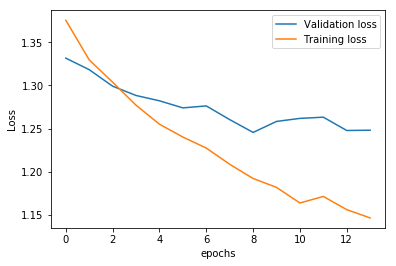

In [259]:
plt.plot(range(len(loss_val)),loss_val, label='Validation loss')
plt.plot(range(len(loss_train)),loss_train, label='Training loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
loss_file="Loss_for_"
match_regex = "\.(.*)"
name_file= str(N_ASSETS)+"assets_"+str(epochs)+"epochs_"+str(number)+"batch_"+str(rolling_window_step)+ "rollingwindow"+str(VALIDATION_SPLIT)[-1:]+"valsplit"
plt.savefig(loss_file+name_file)
plt.show()


In [260]:
y_pred = np.zeros((int(len(y_test)/batch_dim),batch_dim))
print(y_pred.shape)
for ii, (x_validation,y_validation) in enumerate(testloader):
    x_validation = x_validation.permute([1,0,2])           
    inputs = Variable(x_validation)
    if inputs.shape[1]!= batch_dim:
        print(ii*batch_dim-y_test.shape[0])
        break
    pred = lstm.predict(inputs).data.numpy()
    y_pred[ii,:] = np.argmax(pred, axis=1)
    print(pred)
y_pred.shape

(19, 5)
[[-0.53958309  0.43807393 -1.03382933  0.39169082]
 [-0.31521261  0.35146767 -0.94465655  0.48018846]
 [-0.29058969  0.4200964  -1.10092866  0.49569562]
 [-0.2446579   0.41647846 -1.08556962  0.46596757]
 [-0.49353912  0.352321   -0.98337257  0.32759708]]
[[-0.48724076  0.44620144 -1.01358771  0.38717327]
 [-0.47564358  0.60700274 -1.1420362   0.42875868]
 [-0.2850616   0.36489618 -1.06845641  0.40647677]
 [-0.57007539  0.49402702 -1.08504426  0.32956591]
 [-0.47247151  0.49432206 -0.95118845  0.36278853]]
[[-0.47474706  0.42957395 -0.93411958  0.35951111]
 [-0.20423797  0.2734243  -1.02887905  0.4699662 ]
 [-0.45401949  0.47920054 -1.05787551  0.40324554]
 [-0.25724286  0.33608222 -1.01069772  0.48789236]
 [-0.52383572  0.43958366 -1.00392497  0.35293081]]
[[-0.49601457  0.47883123 -0.98224568  0.37596098]
 [-0.49323294  0.46663976 -1.05375421  0.39459541]
 [-0.51321161  0.47172838 -0.93840313  0.36233911]
 [-0.28440717  0.34753954 -1.03603375  0.40496248]
 [-0.47717318  0.419

(19, 5)

Index(['09/07/2014', '09/12/2014', '09/17/2014', '09/22/2014', '09/27/2014',
       '10/02/2014', '10/07/2014', '10/12/2014', '10/17/2014', '10/22/2014',
       '10/27/2014', '11/01/2014', '11/06/2014', '11/11/2014', '11/16/2014',
       '11/21/2014', '11/26/2014', '12/01/2014', '12/06/2014', '12/11/2014',
       '12/16/2014', '12/21/2014', '12/26/2014', '12/31/2014', '01/05/2015',
       '01/10/2015', '01/15/2015', '01/20/2015', '01/25/2015', '01/30/2015',
       '02/04/2015', '02/09/2015', '02/14/2015', '02/19/2015', '02/24/2015',
       '03/01/2015', '03/06/2015', '03/11/2015', '03/16/2015', '03/21/2015',
       '03/26/2015', '03/31/2015', '04/05/2015', '04/10/2015', '04/15/2015',
       '04/20/2015', '04/25/2015', '04/30/2015', '05/05/2015', '05/10/2015',
       '05/15/2015', '05/20/2015', '05/25/2015', '05/30/2015', '06/04/2015',
       '06/09/2015', '06/14/2015', '06/19/2015', '06/24/2015', '06/29/2015',
       '07/04/2015', '07/09/2015', '07/14/2015', '07/19/2015', '07/24/2015',

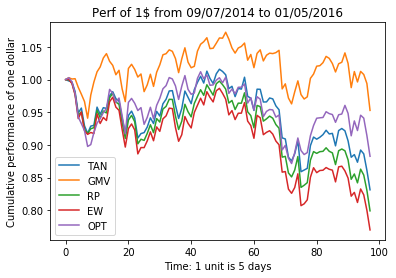

In [261]:
y_bar = np.reshape(y_pred,y_pred.shape[0]*y_pred.shape[1])

p_perf_test = p_perf[start_test_index:]
dif = p_perf_test.shape[0] - y_bar.shape[0]

y_bar_approxi = np.append(y_bar,np.zeros(dif))

opt_portfolio = np.zeros(len(p_perf_test))
for i in range(len(p_perf_test)):
    opt_portfolio[i] = p_perf_test[i,int(y_bar_approxi[i])]

performance = np.c_[p_perf_test, opt_portfolio]
strategies = ['TAN','GMV','RP','EW','OPT']

ones = np.ones((1,5))
dates_cumperf = dates[::number]
dates_cumperf = dates_cumperf[start_test_index:-1]
print(dates_cumperf)
cumperf = np.cumprod(np.concatenate((ones,1 + performance),axis=0),axis=0) #cumprod because when we win money we reinvest it directly
print(cumperf.shape)
df_cumperf = pd.DataFrame(data=cumperf,columns=strategies)#.set_index(dates_cumperf) #,index=dates_cumperf
mid_index =int(len(df_cumperf)/2) +3
#df_cumperf=df_cumperf[:mid_index]
print(df_cumperf)
plt.plot(df_cumperf)
plt.xlabel('Time: 1 unit is {} days'.format(number))
plt.ylabel('Cumulative performance of one dollar')
plt.title('Perf of 1$ from {} to {}'.format(dates_cumperf[0],dates_cumperf[-1]))#mid_index] ))
plt.legend(strategies, loc=0)

#plt.ylim([-20,50])


print('\n (e) Cumulative performance of 1$ invested in {}:'.format(dates_cumperf[0]))
plt.savefig("Cumulative_perf_of_1$"+name_file)
plt.show()

In [262]:
y_bar_approxi

array([ 1.,  3.,  3.,  3.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  3.,  1.,
        3.,  1.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,
        1.,  1.,  1.,  1.,  1.,  3.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,
        3.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,  3.,  3.,  1.,  3.,
        3.,  1.,  3.,  3.,  1.,  3.,  1.,  1.,  1.,  3.,  3.,  1.,  1.,
        1.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,
        3.,  1.,  1.,  3.,  1.,  3.,  3.,  1.,  1.,  3.,  1.,  3.,  1.,
        1.,  1.,  3.,  1.,  0.,  0.])